In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

number_of_classes = 10
train_labels = utils.to_categorical(train_labels, number_of_classes)
test_labels = utils.to_categorical(test_labels, number_of_classes)

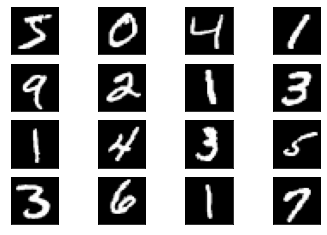

In [3]:
fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(train_images[i], cmap='Greys_r')

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(filters=25, kernel_size=(12,12), strides=(2,2), padding='valid', data_format='channels_last', activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0, stddev=5e-2), bias_initializer=tf.keras.initializers.Constant(value=0.1), input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=25, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0, stddev=5e-2), bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(layers.MaxPool2D(pool_size=(2,2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(units=1024, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0, stddev=5e-2), bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(units=10, activation='linear', use_bias=True, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0, stddev=5e-2), bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(layers.Softmax())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 25)          3625      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 25)          15650     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 25)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              410624    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

number_of_iterations = 5000
validation_frequency = 100
history = model.fit(train_images, train_labels, batch_size=50, epochs=number_of_iterations, validation_data=(test_images, test_labels), steps_per_epoch=1, validation_freq=validation_frequency)

cy: 1.0000
Epoch 4804/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9600
Epoch 4805/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9800
Epoch 4806/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9600
Epoch 4807/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9800
Epoch 4808/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9800
Epoch 4809/5000
1/1 [==============================] - 0s 969us/step - loss: 0.0564 - accuracy: 0.9800
Epoch 4810/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9800
Epoch 4811/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 1.0000
Epoch 4812/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9600
Epoch 4813/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1

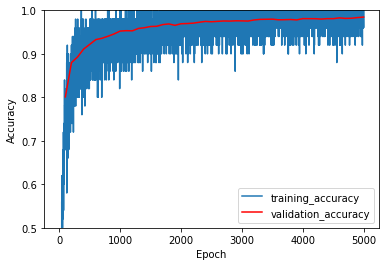

In [6]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(list(range(validation_frequency, number_of_iterations + 1, validation_frequency)), history.history['val_accuracy'], 'r-', label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0541 - accuracy: 0.9846
0.9846000075340271
